# Q3

In [1]:
!which dbt

/home/arabellyabhinav/.local/bin/dbt


# Q9

In [2]:
!grep -v password ~/.dbt/profiles.yml

p4_data_pipeline:
  outputs:
    dev:
      account: xzizkft-hh42877
      database: SURVEY_DATABASE
      role: P4_ROLE
      schema: SURVEY_SCHEMA
      threads: 1
      type: snowflake
      user: ABHINAVARABELLY
      warehouse: P4_WAREHOUSE
  target: dev


In [3]:
!cat ~/p4_data_pipeline/models/schema.yml

version: 2

sources:
  - name: P4
    database: SURVEY_DATABASE
    schema: SURVEY_SCHEMA
    tables:
      - name: SURVEY
models:
  - name: transform_survey
    description: "Transform Survey DB"


In [4]:
!cat ~/p4_data_pipeline/models/staging/transform_survey.sql


with raw_survey as (
    select * from {{ source('P4', 'SURVEY') }}
),

transform_survey as (
    select
        {{ adapter.quote('EMAIL_ADDRESS') }} as email,
        {{ adapter.quote('WHAT_IS_YOUR_AGE_') }} as age,
        {{ adapter.quote('WHICH_BEST_DESCRIBES_YOUR_PRIMARY_MAJOR_OR_FIELD_OF_STUDY_IF_YOU_HAVE_MORE_THAN_ONE_MAJOR_PLEASE_SPECIFY_OTHER_MAJORS_AS_PART_OF_THE_NEXT_QUESTION_') }} as primary_major,
	{{ adapter.quote('IF_YOU_HAVE_SECONDARY_MAJORS_PLEASE_LIST_THEM_HERE_SEPARATED_BY_A_COMMA_') }} as secondary_major,
	{{ adapter.quote('WHAT_FACTOR_INFLUENCES_YOUR_COURSE_SELECTION_THE_MOST_') }} as course_influence,
	{{ adapter.quote('WHAT_IS_THE_5_DIGIT_ZIP_CODE_OF_YOUR_RESIDENCE_WHILE_ATTENDING_CLASSES_IF_YOU_ARE_NOT_SURE_CHECK_HERE_HTTPS_TOOLS_USPS_COM_ZIP_CODE_LOOKUP_HTM_BYADDRESS_') }} as zip_code,
	{{ adapter.quote('WHAT_IS_YOUR_FAVORITE_PIZZA_TOPPING_') }} as favorite_topping,
	{{ adapter.quote('HAVE_YOU_EVER_IN_YOUR_LIFE_HAD_A_PET_') }} as has_pet,
	{{ adapter.quote('ARE

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import snowflake.connector

In [11]:
with open('password.txt','r') as file:
    password = file.read()
    password = password.strip()

In [4]:
connector = snowflake.connector.connect(
    user="ABHINAVARABELLY",
    password=password,
    account="xzizkft-hh42877",
    warehouse="P4_WAREHOUSE",
    database="STOCK_DB",
    schema="STOCK_SCHEMA",
    role="P4_ROLE",
)

In [14]:
connector_new = snowflake.connector.connect(
    user="ABHINAVARABELLY",
    password=password,
    account="xzizkft-hh42877",
    warehouse="P4_WAREHOUSE",
    database="SURVEY_DATABASE",
    schema="SURVEY_SCHEMA",
    role="P4_ROLE",
)

# Q10

In [16]:
#How does the preference for being an "early bird" or "night owl" vary by major?

query = """SELECT 
    WHICH_BEST_DESCRIBES_YOUR_PRIMARY_MAJOR_OR_FIELD_OF_STUDY_IF_YOU_HAVE_MORE_THAN_ONE_MAJOR_PLEASE_SPECIFY_OTHER_MAJORS_AS_PART_OF_THE_NEXT_QUESTION_ AS major,
    WOULD_YOU_DESCRIBE_YOURSELF_AS_AN_EARLY_BIRD_OR_A_NIGHT_OWL_ AS sleep_preference,
    COUNT(*) AS count
FROM 
    SURVEY
GROUP BY 
    major, sleep_preference
ORDER BY 
    major, count DESC;"""

df = pd.read_sql(query, connector_new)
df

/tmp/ipykernel_59746/136905324.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connector_new)


,MAJOR,SLEEP_PREFERENCE,COUNT
0,Business: Actuarial,early bird,1
1,Business: Information Systems,night owl,1
2,Business: Other,early bird,1
3,Computer Science,night owl,51
4,Computer Science,early bird,13
5,Computer Science,no preference,12
6,Data Science,night owl,39
7,Data Science,early bird,17
8,Data Science,no preference,13
9,Engineering: Other,night owl,2


# Q11

In [19]:
#What percentage of students in each ZIP code have pets?

query = """SELECT 
    WHAT_IS_THE_5_DIGIT_ZIP_CODE_OF_YOUR_RESIDENCE_WHILE_ATTENDING_CLASSES_IF_YOU_ARE_NOT_SURE_CHECK_HERE_HTTPS_TOOLS_USPS_COM_ZIP_CODE_LOOKUP_HTM_BYADDRESS_ AS zip_code,
    ROUND(
        100.0 * SUM(CASE WHEN HAVE_YOU_EVER_IN_YOUR_LIFE_HAD_A_PET_ = 'Yes' THEN 1 ELSE 0 END) / COUNT(*),
        2
    ) AS pet_ownership_percentage
FROM 
    survey
GROUP BY 
    zip_code
ORDER BY 
    pet_ownership_percentage DESC;"""

df = pd.read_sql(query, connector_new)
df    

/tmp/ipykernel_59746/947451648.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connector_new)


,ZIP_CODE,PET_OWNERSHIP_PERCENTAGE
0,53726,100.00
1,53724,100.00
2,53073,100.00
3,53704,100.00
4,53702,100.00
5,53703,79.41
6,53706,72.73
7,53711,71.43
8,53715,62.50
9,53719,50.00


# Q12

In [22]:
#What is the average age of students by their favorite hobby category?

query = """SELECT 
    WHAT_IS_YOUR_FAVORITE_HOBBY_ AS hobby,
    ROUND(AVG(WHAT_IS_YOUR_AGE_), 1) AS average_age,
    COUNT(*) AS hobby_count
FROM 
    survey
GROUP BY 
    hobby
ORDER BY 
    hobby_count DESC
    LIMIT 10;"""


df = pd.read_sql(query, connector_new)
df    

/tmp/ipykernel_59746/3350059095.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connector_new)


,HOBBY,AVERAGE_AGE,HOBBY_COUNT
0,Reading,21.0,6
1,Guitar,20.8,4
2,basketball,20.3,4
3,Gaming,20.3,3
4,Watching movies,20.3,3
5,Drawing,22.0,3
6,Basketball,21.0,3
7,Volleyball,21.0,3
8,Sports,21.0,3
9,Watching Movies,21.0,2


# Q13

In [27]:
#What's the most popular way students would spend an extra hour in their day?

query = """SELECT 
    IF_YOU_HAD_AN_EXTRA_HOUR_IN_YOUR_DAY_HOW_WOULD_YOU_SPEND_IT_ AS activity,
    COUNT(*) AS number_of_students,
    ROUND(100.0 * COUNT(*) / (SELECT COUNT(*) FROM survey), 1) AS percentage
FROM 
    SURVEY
GROUP BY 
    activity
ORDER BY 
    number_of_students DESC
LIMIT 5;"""


df = pd.read_sql(query, connector_new)
df  

/tmp/ipykernel_59746/2451971721.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connector_new)


,ACTIVITY,NUMBER_OF_STUDENTS,PERCENTAGE
0,Working on a hobby,44,27.7
1,Sleeping,43,27.0
2,Exercising,33,20.8
3,Playing video games,21,13.2
4,Reading for fun,18,11.3


# Q14

/tmp/ipykernel_59746/2938963547.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("""


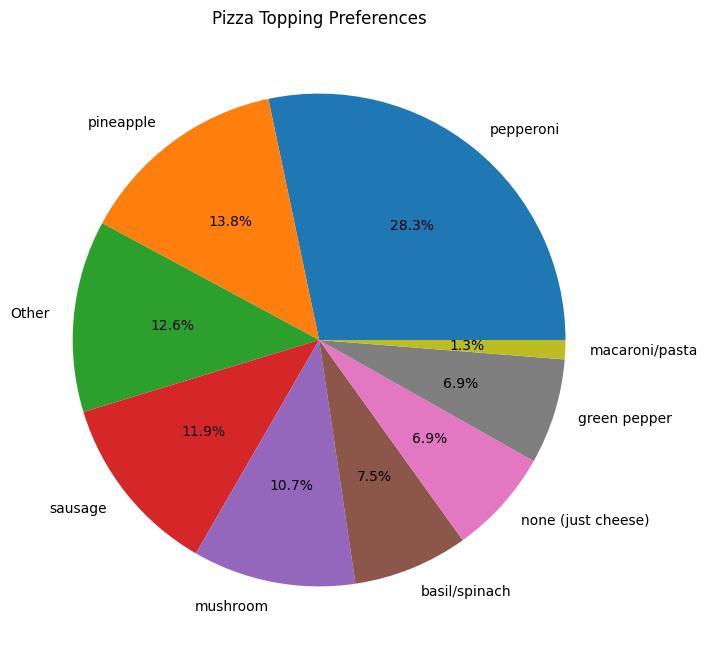

In [30]:
#What are the most common pizza toppings among all students?¶

df = pd.read_sql("""
SELECT 
    WHAT_IS_YOUR_FAVORITE_PIZZA_TOPPING_ AS topping,
    COUNT(*) AS count
FROM 
    survey
GROUP BY 
    topping
ORDER BY 
    count DESC;
""", connector_new)
df

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.pie(df['COUNT'], labels=df['TOPPING'], autopct='%1.1f%%')
plt.title('Pizza Topping Preferences')
plt.show()

# Q15

/tmp/ipykernel_59746/3316374701.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("""


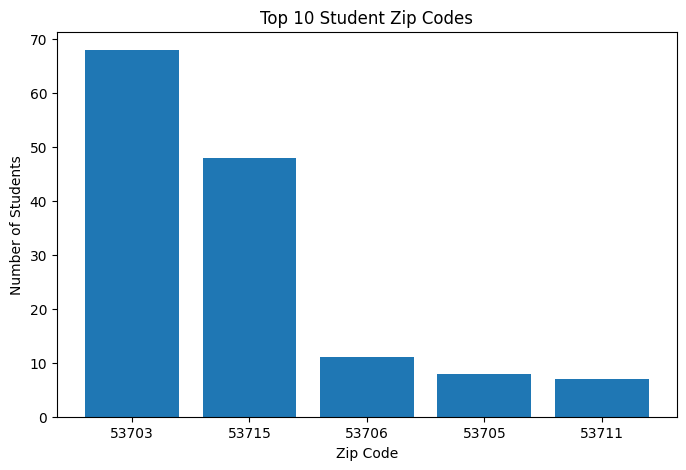

In [33]:
#Which zip codes has the most students in the survey?

df = pd.read_sql("""
SELECT 
    TOP 5 WHAT_IS_THE_5_DIGIT_ZIP_CODE_OF_YOUR_RESIDENCE_WHILE_ATTENDING_CLASSES_IF_YOU_ARE_NOT_SURE_CHECK_HERE_HTTPS_TOOLS_USPS_COM_ZIP_CODE_LOOKUP_HTM_BYADDRESS_ AS zip_code,
    COUNT(*) AS student_count
FROM 
    survey
GROUP BY 
    zip_code
ORDER BY 
    student_count DESC;
""", connector_new)
df

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(df['ZIP_CODE'].astype(str), df['STUDENT_COUNT'])

plt.title('Top 10 Student Zip Codes')
plt.xlabel('Zip Code')
plt.ylabel('Number of Students')

plt.show()

# Q16

In [35]:
#How many students are runners vs. non-runners?

query = """SELECT  
    CASE 
        WHEN ARE_YOU_A_RUNNER_CONSIDER_BOTH_RUNNING_ON_TREADMILL_AND_OUTDOORS_ = 'Yes' THEN 'Runner'
        ELSE 'Non-Runner'  
    END AS runner_status,  
    COUNT(*) AS number_of_students,
    ROUND(100.0 * COUNT(*) / (SELECT COUNT(*) FROM survey), 1) AS percentage
FROM  
    survey 
GROUP BY  
    runner_status;"""

df = pd.read_sql(query, connector_new)
df  

/tmp/ipykernel_59746/1238830427.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connector_new)


,RUNNER_STATUS,NUMBER_OF_STUDENTS,PERCENTAGE
0,Non-Runner,99,62.3
1,Runner,60,37.7


# Q18

In [5]:
!grep -v password ~/.dbt/profiles.yml

p4_data_pipeline:
  outputs:
    dev:
      account: xzizkft-hh42877
      database: SURVEY_DATABASE
      role: P4_ROLE
      schema: SURVEY_SCHEMA
      threads: 1
      type: snowflake
      user: ABHINAVARABELLY
      warehouse: P4_WAREHOUSE
    stock_db:
      type: snowflake
      account: xzizkft-hh42877
      user: ABHINAVARABELLY
      role: P4_ROLE
      database: STOCK_DB
      warehouse: P4_WAREHOUSE
      schema: STOCK_SCHEMA
      threads: 1

  target: dev


# Q19

In [7]:
!cat ~/p4_data_pipeline/models/schema.yml

version: 2

sources:
  - name: P4
    database: SURVEY_DATABASE
    schema: SURVEY_SCHEMA
    tables:
      - name: SURVEY

  - name: stock_by_day
    database:  STOCK_TRACKING_US_STOCK_PRICES_BY_DAY
    schema: STOCK
    tables:
      - name: US_STOCK_METRICS

  - name: fx_by_day
    database: FOREX_TRACKING_CURRENCY_EXCHANGE_RATES_BY_DAY
    schema: STOCK
    tables:
      - name: FOREX_METRICS

  - name: airbyte_csv_data
    database: STOCK_DB
    schema: STOCK_SCHEMA
    tables:
      - name: TRADING_BOOKS
      - name: WEIGHTS_TABLE

models:
  - name: transform_survey
    description: "Transform Survey DB"


# Q20

In [9]:
!cat ~/p4_data_pipeline/dbt_project.yml


# Name your project! Project names should contain only lowercase characters
# and underscores. A good package name should reflect your organization's
# name or the intended use of these models
name: 'p4_data_pipeline'
version: '1.0.0'

# This setting configures which "profile" dbt uses for this project.
profile: 'p4_data_pipeline'

# These configurations specify where dbt should look for different types of files.
# The `model-paths` config, for example, states that models in this project can be
# found in the "models/" directory. You probably won't need to change these!
model-paths: ["models"]
analysis-paths: ["analyses"]
test-paths: ["tests"]
seed-paths: ["seeds"]
macro-paths: ["macros"]
snapshot-paths: ["snapshots"]

clean-targets:         # directories to be removed by `dbt clean`
  - "target"
  - "dbt_packages"


# Configuring models
# Full documentation: https://docs.getdbt.com/docs/configuring-models

# In this example config, we tell dbt to build all models in the example/
# di

# Q21

In [2]:
!cat ~/p4_data_pipeline/models/staging/staging_valid_stock_tickers.sql

SELECT DISTINCT
    trade_date as date,
    ticker
FROM {{ source('airbyte_csv_data', 'TRADING_BOOKS') }}
WHERE desk = 'Equity Desk'


In [3]:
!cat ~/p4_data_pipeline/models/staging/staging_valid_fx_tickers.sql

SELECT DISTINCT
    trade_date as date,
    ticker
FROM {{ source('airbyte_csv_data', 'TRADING_BOOKS') }}
WHERE desk = 'FX Desk'


In [4]:
!cat ~/p4_data_pipeline/models/staging/staging_valid_stock_info.sql

select
    a.ticker,
    a.date,
    b."OPEN" as open,
    b."CLOSE" as close,
    b."HIGH" as high,
    b."LOW" as low
from {{ ref('staging_valid_stock_tickers') }} a
join {{ source('stock_by_day', 'US_STOCK_METRICS') }} b
on a.ticker = b."TICKER" and a.date = b."RUN_DATE"


In [5]:
!cat ~/p4_data_pipeline/models/staging/staging_valid_fx_info.sql

select
    a.ticker,
    a.date,
    b."OPEN" as open,
    b."CLOSE" as close,
    b."HIGH" as high,
    b."LOW" as low
from {{ ref('staging_valid_fx_tickers') }} a
join {{ source('fx_by_day', 'FOREX_METRICS') }} b
on a.ticker = b."CURRENCY_PAIR_NAME" and a.date = b."RUN_DATE"


# Q22

In [36]:
!cat ~/p4_data_pipeline/models/staging/staging_buy_sell_joint.sql

SELECT
  buy.TRADE_DATE AS date_trade,
  buy.TRADER_NAME AS name_of_trader,
  buy.TRADE_ID AS trade_id,
  buy.QUANTITY AS buy_quantity,
  buy.PRICE AS price_buy,
  buy.DESK AS desk,
  buy.TICKER AS ticker,
  sell.QUANTITY AS quantity_sell,
  sell.PRICE AS price_sell
FROM {{ source('airbyte_csv_data', 'TRADING_BOOKS') }} buy
JOIN {{ source('airbyte_csv_data', 'TRADING_BOOKS') }} sell
  ON buy.TRADER_NAME = sell.TRADER_NAME
  AND buy.TICKER = sell.TICKER
  AND buy.TRADE_DATE = sell.TRADE_DATE
WHERE buy.TRADE_TYPE = 'BUY'
  AND sell.TRADE_TYPE = 'SELL'
ORDER BY buy.TRADE_ID


# Q23

In [37]:
!cat ~/p4_data_pipeline/models/staging/fact_tab_trading.sql

{{ config(materialized='table') }}

SELECT
  trade_id,
  buy_quantity * price_buy AS buy_money,
  quantity_sell * price_sell AS sell_money,
  (quantity_sell * price_sell) - (buy_quantity * price_buy) AS profit
FROM {{ ref('staging_buy_sell_joint') }}
ORDER BY trade_id


# Q24

In [22]:
query = """
SELECT
  trade_books.desk,
  SUM(fact_tab.profit) AS total_profit
FROM STOCK_DB.STOCK_SCHEMA.TRADING_BOOKS trade_books
JOIN STOCK_DB.STOCK_SCHEMA.FACT_TAB_TRADING fact_tab
ON trade_books.trade_id = fact_tab.trade_id
WHERE trade_books.trade_type = 'BUY'
GROUP BY trade_books.desk
ORDER BY trade_books.desk;
"""
df = pd.read_sql(query, connector)
df

/tmp/ipykernel_56655/2366644858.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connector)


,DESK,TOTAL_PROFIT
0,Equity Desk,2718.75
1,FX Desk,5000.00


# Q25

In [24]:
query = """
SELECT
  trade_books.desk,
  SUM(fact_tab.profit) / NULLIF(SUM(fact_tab.buy_money), 0) AS profit_rate
FROM STOCK_DB.STOCK_SCHEMA.TRADING_BOOKS trade_books
JOIN STOCK_DB.STOCK_SCHEMA.FACT_TAB_TRADING fact_tab
ON trade_books.trade_id = fact_tab.trade_id
WHERE trade_books.trade_type = 'BUY'
GROUP BY trade_books.desk
ORDER BY trade_books.desk;
"""
df = pd.read_sql(query, connector)
df

/tmp/ipykernel_56655/3551269975.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connector)


,DESK,PROFIT_RATE
0,Equity Desk,0.012701
1,FX Desk,0.006342
